# 실습 1

In [61]:
def printProb(value):
    # Print probability percent rounded to three decimal place
    print(str(round(value * 100, 2)) + '%')

In [62]:
# Sample Space
cards = 52

# Outcomes
aces = 4

# Divide possible outcomes by the sample set
aceProbability = aces / cards

# Print probability rounded to two decimal places
printProb(aceProbability)

7.69%


In [63]:
def event_probability(event_outcomes, sample_space):
    probability = (event_outcomes / sample_space)
    return probability

In [64]:
# Sample Space
cards = 52

# Determine the probability of drawing a heart
hearts = 13
heart_probability = event_probability(hearts, cards)

# Determine the probability of drawing a face card
face_cards = 12
face_card_probability = event_probability(face_cards, cards)

# Determine the probability of drawing the queen of hearts
queen_of_hearts = 1
queen_of_hearts_probability = event_probability(queen_of_hearts, cards)

# Print each probability
printProb(heart_probability)
printProb(face_card_probability)
printProb(queen_of_hearts_probability)

25.0%
23.08%
1.92%


In [65]:
# Sample Space
deck = {
    'cards': 52,
    'spades': 13,
    'hearts': 13,
    'diamonds': 13,
    'clubes': 13
}

In [66]:
def event_probability (event_outcomes, sample_space):
    probability = (event_outcomes / sample_space)
    return probability

In [67]:
# Probability of drawing spade
printProb(event_probability(deck['spades'], deck['cards']))
printProb(event_probability(deck['spades'], deck['cards']))
printProb(event_probability(deck['spades'], deck['cards']))
# Probability of drawing spade
printProb(event_probability(deck['hearts'], deck['cards']))
printProb(event_probability(deck['hearts'], deck['cards']))
printProb(event_probability(deck['hearts'], deck['cards']))

25.0%
25.0%
25.0%
25.0%
25.0%
25.0%


In [68]:
# returns the probability of drawing the card then draw from the deck
def draw(card, deck):
    prob = (deck[card])/(deck['cards'])
    deck[card]=deck[card]-1
    deck['cards']=deck['cards']-1
    return prob

In [69]:
# Print probabilities# Print 
printProb(draw('spades', deck))
printProb(draw('spades', deck))
printProb(draw('spades', deck))
printProb(draw('hearts', deck))
printProb(draw('hearts', deck))
printProb(draw('hearts', deck))

25.0%
23.53%
22.0%
26.53%
25.0%
23.4%


# 실습 2

In [26]:
%matplotlib inline
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

In [27]:
#helper function
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
        
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
#load the csv file#load t 
# df=pd.read_csv('../input/Iris.csv')
iris = datasets.load_iris()

#Replace Species type with numbers
# df.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

# Split-out train, test dataset
array = iris.data
X = iris.data[:, [0, 1]]
Y = iris.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.5, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


Class names
['setosa' 'versicolor' 'virginica']


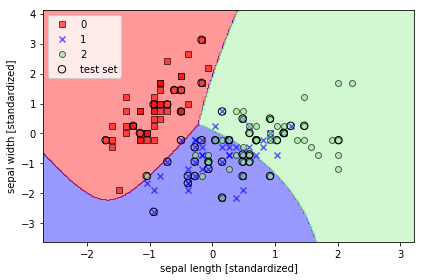

In [33]:
#Initialize Gaussian Naive Bayes
nb_clf = GaussianNB()

#Fitting the training set
nb_clf.fit(X_train_std, y_train) 

plot_decision_regions(X_combined_std, y_combined, classifier=nb_clf, test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
print("\nClass names")
print(iris.target_names)
plt.show()


Class names
['setosa' 'versicolor' 'virginica']


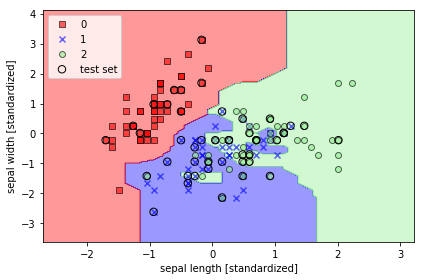

In [30]:
#Initialize KNN#Initia 
knn_clf = KNeighborsClassifier(n_neighbors=1, p=1, metric='minkowski')

#Fitting the training set
knn_clf.fit(X_train_std, y_train) 

plot_decision_regions(X_combined_std, y_combined, classifier=knn_clf, test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
print("\nClass names")
print(iris.target_names)
plt.show()

In [87]:
nb_y_pred = nb_clf.predict(X_test_std)

print("Classification Report")
print(classification_report(y_test, nb_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(y_test, nb_y_pred))

Classification Report
             precision    recall  f1-score   support

     setosa       0.91      1.00      0.95        21
 versicolor       0.62      0.70      0.66        30
  virginica       0.56      0.42      0.48        24

avg / total       0.68      0.69      0.68        75


 Accuracy
0.6933333333333334


Confusion matrix, without normalization
[[21  0  0]
 [ 1 21  8]
 [ 1 13 10]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.03 0.7  0.27]
 [0.04 0.54 0.42]]


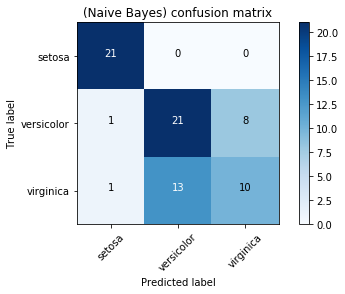

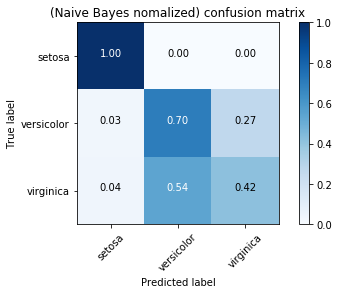

In [88]:
# Compute confusion matrix# Compu 
nb_cnf_matrix = confusion_matrix(y_test, nb_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(nb_cnf_matrix, classes=iris.target_names,
                      title='(Naive Bayes) confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(nb_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(Naive Bayes nomalized) confusion matrix')

plt.show()

In [90]:
knn_y_pred = knn_clf.predict(X_test_std)

print("Classification Report")
print(classification_report(y_test, knn_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(y_test, knn_y_pred))

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.64      0.47      0.54        30
  virginica       0.50      0.67      0.57        24

avg / total       0.69      0.68      0.68        75


 Accuracy
0.68


Confusion matrix, without normalization
[[21  0  0]
 [ 0 14 16]
 [ 0  8 16]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.47 0.53]
 [0.   0.33 0.67]]


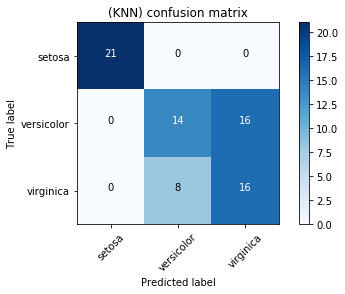

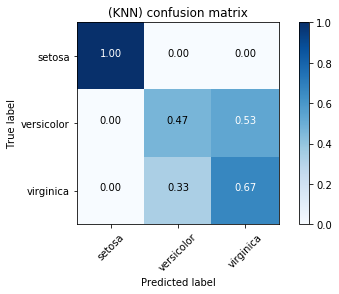

In [91]:
# Compute confusion matrix
knn_cnf_matrix = confusion_matrix(y_test, knn_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(knn_cnf_matrix, classes=iris.target_names,
                      title='(KNN) confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(knn_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(KNN) confusion matrix')

plt.show()

In [98]:
knn_y_pred = knn_clf.predict(X_test_std)

print("Classification Report")
print(classification_report(y_test, knn_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(y_test, knn_y_pred))

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.64      0.47      0.54        30
  virginica       0.50      0.67      0.57        24

avg / total       0.69      0.68      0.68        75


 Accuracy
0.68


Confusion matrix, without normalization
[[21  0  0]
 [ 0 14 16]
 [ 0  8 16]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.47 0.53]
 [0.   0.33 0.67]]


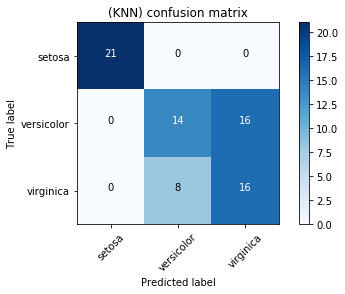

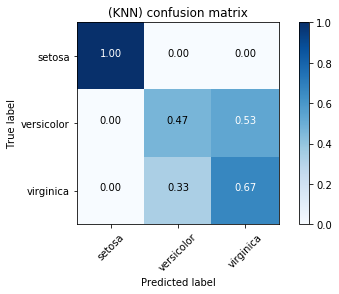

In [99]:
# Compute confusion matrix
knn_cnf_matrix = confusion_matrix(y_test, knn_y_pred)
np.set_printoptions(precision=2)
#True label은 실제 데이터 값 / 색이 진하게 나타날 수록 정확도가 높은 것 

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(knn_cnf_matrix, classes=iris.target_names,
                      title='(KNN) confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(knn_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(KNN) confusion matrix')

plt.show()

In [100]:
#load the csv file
# df=pd.read_csv('../input/Iris.csv')
iris = datasets.load_iris()

#Replace Species type with numbers
# df.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

# Split-out train, test dataset
array = iris.data
full_X = iris.data
Y = iris.target

full_X_train, full_X_test, full_y_train, full_y_test = model_selection.train_test_split(full_X, Y, test_size=0.5, random_state=0)

sc = StandardScaler()
sc.fit(full_X_train)
full_X_train_std = sc.transform(full_X_train)
full_X_test_std = sc.transform(full_X_test)
full_X_combined_std = np.vstack((full_X_train_std, full_X_test_std))
full_y_combined = np.hstack((full_y_train, full_y_test))

In [101]:
full_nb_clf = GaussianNB()

#Fitting the training set
full_nb_clf.fit(full_X_train_std, full_y_train)

GaussianNB(priors=None)

In [102]:
full_nb_y_pred = full_nb_clf.predict(full_X_test_std)

print("Classification Report")
print(classification_report(full_y_test, full_nb_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(full_y_test, full_nb_y_pred))

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.88      1.00      0.94        30
  virginica       1.00      0.83      0.91        24

avg / total       0.95      0.95      0.95        75


 Accuracy
0.9466666666666667


In [107]:
#Initialize Gaussian Naive Bayes
full_knn_clf = KNeighborsClassifier(n_neighbors=5, p=1, metric='minkowski')

#Fitting the training set
full_knn_clf.fit(full_X_train_std, full_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='uniform')

In [108]:
full_knn_y_pred = full_knn_clf.predict(full_X_test_std)

print("Classification Report")
print(classification_report(full_y_test, full_knn_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(full_y_test, full_knn_y_pred))

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.90      0.93      0.92        30
  virginica       0.91      0.88      0.89        24

avg / total       0.93      0.93      0.93        75


 Accuracy
0.9333333333333333


# 실습 3

In [34]:
# age, income, student, credit_rating, buys_computer# age,  
trainSet = [
    ["<=30", "high", "no", "fair", "no"],
    ["<=30", "high", "no", "excellent", "no"],
    ["31...40", "high", "no", "fair", "yes"],
    [">40", "high", "no", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    [">40", "low", "yes", "excellent", "no"],
    ["31...40", "low", "yes", "excellent", "yes"],
    ["<=30", "medium", "no", "fair", "no"],
    ["<=30", "low", "yes", "fair", "yes"],
    [">40", "medium", "yes", "fair", "yes"],
    ["<=30", "medium", "yes", "excellent", "yes"],
    ["31...40", "medium", "no", "excellent", "yes"],
    ["31...40", "high", "yes", "fair", "yes"],
    [">40", "medium", "no", "excellent", "no"]
]

In [78]:
# get number of class in the dataSet
def countClass(classValue, dataSet): # yes or no , trainSet 받음
    n = 0
    for instance in dataSet:
        if (classValue in instance[-1]):
            n += 1
    return n

# get number of value in i^th column
def count(classValue, i, value, dataSet):
    n = 0
    for instance in dataSet:
        # fill the blank (1) & (2)
        if (classValue in instance[-1]) and (value in instance[i]):
            n += 1
            
    return n

def naiveBayesPrint(classValue):
    # print
    print("\n")
    print("P(" + classValue + "|X) = P(" + classValue + ") * P(X|" + classValue + ") = ")
    print("P(" + classValue + ")", end='')
    for x in X:
        print(" * P(" + x + "|" + classValue + ")", end='')
    print()
    

def getPredictionBayes(dataSet, X):
    classProb = {
        'yes': 1,
        'no': 1
    }
    numberOfData = len(dataSet)
    
    for classValue in classProb.keys():
        probability = 1
        
        naiveBayesPrint(classValue)
        
        # P(Yes) or P(No)
        classCount = countClass(classValue, dataSet) # yes와 no의 카운트 세줌
        # fill the blank (3)
        p = classCount/numberOfData
        probability *= p
        print("%.5f" % p, end='')
        
        for i in range(len(X)):
            value = X[i]
            
            # ex) P(<30|Yes)
            
            # fill the blank (4)
            p = count(classValue,i,value,dataSet)/classCount
            print(" * %.5f" % p, end='')
            probability *= p
        print("\n = %.5f" % probability)
        
        classProb[classValue] = probability
    
    bestClass, bestProb = None, -1   
    for classValue, probability in classProb.items():
        if bestClass is None or probability > bestProb:
            bestProb = probability
            bestClass = classValue
        
    return bestClass, bestProb

In [79]:
X = ["<=30", "medium", "yes", "fair"]
print("Test data")
print("X: ", X)

label, probability = getPredictionBayes(trainSet, X)
print("\n\n####################################")
print("X is classified to \"" + label + "\"")
print("probability = ", probability)
print("####################################")

Test data
X:  ['<=30', 'medium', 'yes', 'fair']


P(yes|X) = P(yes) * P(X|yes) = 
P(yes) * P(<=30|yes) * P(medium|yes) * P(yes|yes) * P(fair|yes)
0.64286 * 0.22222 * 0.44444 * 0.66667 * 0.66667
 = 0.02822


P(no|X) = P(no) * P(X|no) = 
P(no) * P(<=30|no) * P(medium|no) * P(yes|no) * P(fair|no)
0.35714 * 0.60000 * 0.40000 * 0.20000 * 0.40000
 = 0.00686


####################################
X is classified to "yes"
probability =  0.02821869488536155
####################################


# 실습 4

In [80]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

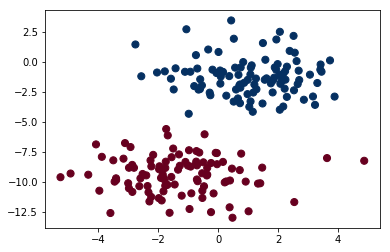

In [81]:
X, y = make_blobs(200, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

Intuition of Generative Model


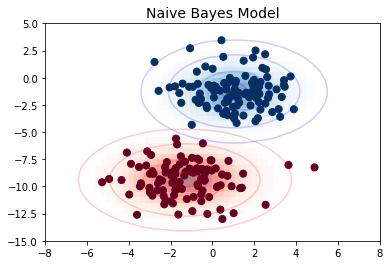

In [82]:
X, y = make_blobs(200, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)
print("Intuition of Generative Model")
#fig.savefig('./NB_example.png')

In [83]:
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

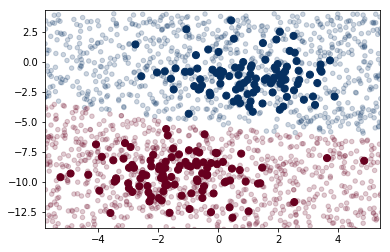

In [84]:
#training data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()

#new data
alpha = 0.2 #opacity degree
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=alpha)
plt.axis(lim);

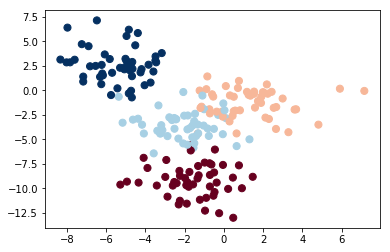

In [119]:
X, y = make_blobs(200, 2, centers=4, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

Intuition of Generative Model


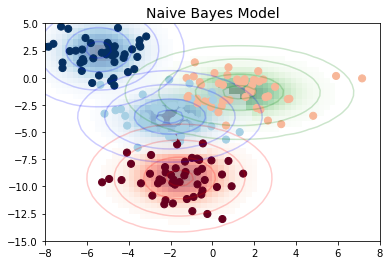

In [164]:
X, y = make_blobs(200, 2, centers=4, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'green','Blue','Blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)
print("Intuition of Generative Model")
#fig.savefig('./NB_example.png')

In [165]:
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-9,-13]+[14,18]*rng.rand(2000,2)
ynew = model.predict(Xnew)

[-8, 4, -12.5, 5]

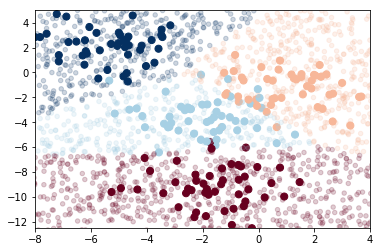

In [169]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()

#new data
alpha = 0.2 #opacity degree

plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=alpha)
plt.axis([-8,4,-12.5,5])